In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
from matplotlib import pylab, cm
%matplotlib inline
import pylab
from numpy import array, pi,linspace
from astropy.io import fits
import math

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from astropy.table import Table
t = Table.read('Adjusted.fits', format='fits')

In [5]:
print(t)

     Source_Name            Total_flux     ...         z_best       
---------------------- ------------------- ... ---------------------
ILTJ144959.18+552910.9  0.8990734118847026 ...                0.4855
ILTJ144946.61+553941.1  0.7114044731470365 ...                1.7363
ILTJ144716.91+551310.6  0.6295416322224788 ...                 0.647
ILTJ145245.58+560418.6  1.1322565355821288 ...                0.4122
ILTJ144045.22+535612.2  0.8354977412032033 ...                1.5169
ILTJ145436.71+563221.5  0.8348111547045913 ...                0.9048
ILTJ145617.99+563559.9  1.0357284621854421 ...                 0.436
ILTJ144645.07+545017.0  0.5787872031722028 ...   0.11775881052017212
ILTJ144710.33+551431.5  0.5488264585863913 ...                0.3664
ILTJ144543.26+545247.0 0.48434979389836924 ...                0.6533
                   ...                 ... ...                   ...
ILTJ115147.61+484059.3   37.28858495630975 ... 0.0032425837125629187
ILTJ113349.29+530733.5   97.784444

In [6]:
hdul = fits.open('Adjusted.fits')
data = hdul[1].data
flux_tot = data.field('Total_flux') # Obtain the total flux column 
z = data.field('z_best') # Obtain redshift column
Flux_22 = data.field('w4Flux') # Obtain 22 microns flux

In [7]:
#Import package in order to get the function for Luminosity

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

In [8]:
# Luminosity Distance
Lum_d22 = array(cosmo.luminosity_distance([Flux_22])*3.08567758e24) ### Last number converts it into cm
Lum_d = array(cosmo.luminosity_distance([flux_tot])*3.08567758e24) ### Last number converts it into cm

In [9]:
# Luminosity based on redshift and distance
def power(d,f,z):
    P = (4*pi*(d)**2*f*1e-20/(1+z))
    return P
Pw22 = (power(Lum_d,Flux_22,z))
Pw = (power(Lum_d,flux_tot,z)*(1+z)**(-0.7))

In [68]:
adj = np.where(Pw22>=4e43)
adj1 = np.where(Pw>=4e43)
Pw_adj = array((Pw22[adj]))
Pw_adj1 = array((Pw[adj1]))

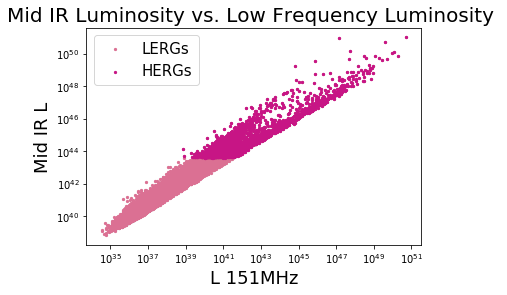

In [45]:
#Limit=[]
#for j in range(len(Pw)):
    #Limit.append(4e43)

#logPlot = plt.gca()
#logPlot.loglog(Pw,Limit,'r--',c='black')
plt.scatter(Pw,Pw22,s =5, c='palevioletred',label='LERGs')
plt.scatter(Pw_adj1,Pw_adj,s =5,c='mediumvioletred',label='HERGs')
plt.yscale('log')
plt.xscale('log')
plt.title('Mid IR Luminosity vs. Low Frequency Luminosity ',fontsize = 20)
plt.legend(loc=2, prop={'size': 15})
plt.xlabel('L 151MHz', fontsize = 18)
plt.ylabel('Mid IR L', fontsize = 18)
plt.show()

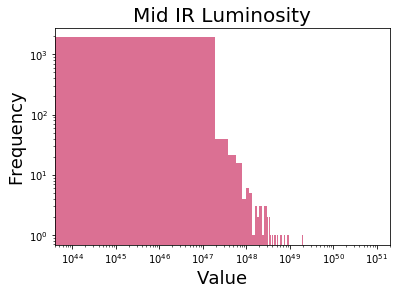

In [76]:
import plotly.plotly as py
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api


plt.hist(Pw_adj, color= "palevioletred", bins = 5000)
plt.title("Mid IR Luminosity", fontsize = 20)
plt.xlabel("Value", fontsize= 18)
plt.ylabel("Frequency", fontsize = 18)
plt.xscale('log')
plt.yscale('log')
rwidth=20
plt.xlim(0,0.2e52)
fig = plt.gcf()

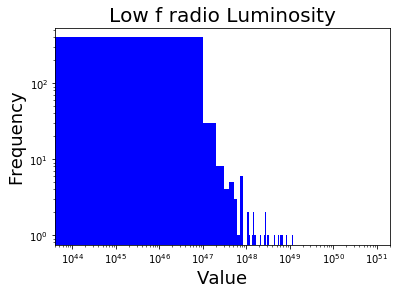

In [69]:
plt.hist(Pw_adj1, color= "blue", bins = 5000)
plt.title("Low f radio Luminosity", fontsize = 20)
plt.xlabel("Value", fontsize= 18)
plt.ylabel("Frequency", fontsize = 18)
plt.xscale('log')
plt.yscale('log')
rwidth=20
plt.xlim(0,0.2e52)
fig = plt.gcf()

In [56]:
#Pw_adj.tolist()
z_new = z[:2057,]

Text(0,0.5,'Power_$151MHz$')

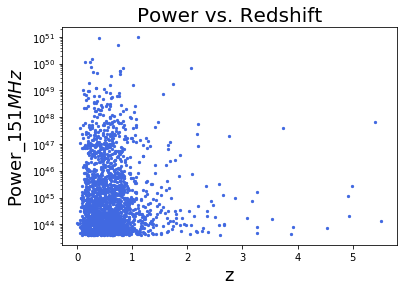

In [74]:
plt.scatter(z_new,Pw_adj,s=5,c='royalblue')
#plt.xlim(0.5,6)
plt.yscale('log')
plt.title('Power vs. Redshift',size=20)
plt.xlabel("z",size=18)
plt.ylabel("Power_$151MHz$",size=18)

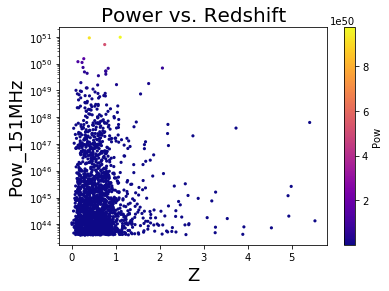

In [75]:
val = plt.scatter(z_new,Pw_adj, c=Pw_adj,s=10, marker='o', cmap=cm.plasma, lw=0)
plt.title('Power vs. Redshift',fontsize = 20)
plt.xlabel('Z', fontsize = 18)
plt.ylabel('Pow_151MHz', fontsize = 18)
plt.yscale('log')
cbar = plt.colorbar(val)
cbar.ax.set_ylabel('Pow')
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.show()